In [1]:
import torch
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

#Step1. input tensor와 target tensor 준비(훈련 데이터)

* MNIST 데이터 셋 Download

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [4]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [6]:
train_labels[0]

5

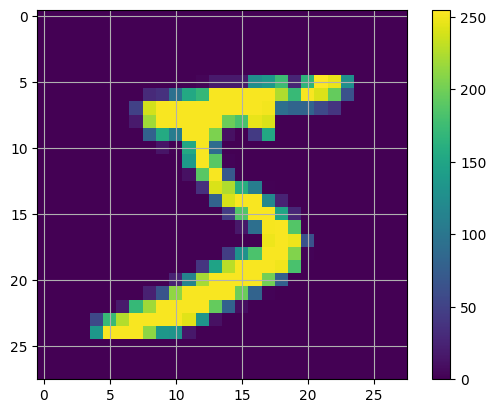

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

#Step2. 데이터 전처리

* flatten : 2D tensor -> 1D tensro
  * (60000, 28, 28) => (60000, 28*28)

In [8]:
# train data
train_images = train_images.reshape((60000, 28*28))

# test data
test_images = test_images.reshape((10000, 28*28))

# Step3. Batch 구성을 위한 데이터 pipline 생성
* 학습데이터를 torch Tensor 객체로 변환
* 변환 된 torch.Tensor 객체를 DataSet 객체에 연결
*Batch 구성을 위한 DataLoader 객체 생성

In [9]:
train_x = torch.Tensor(train_images)
train_y = torch.LongTensor(train_labels)

test_x = torch.Tensor(test_images)
test_y = torch.LongTensor(test_labels)

In [10]:
# dataset 생성
train_dataset = torch.utils.data.TensorDataset(train_x, train_y)
test_dataset = torch.utils.data.TensorDataset(test_x, test_y)

In [12]:
type(train_dataset) # Tensor DataSet

torch.utils.data.dataset.TensorDataset

------
데이터셋에서 하나의 데이터를 추출하는 method

In [13]:
x, y = next(iter(train_dataset))

In [15]:
print(x, y)

tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   

----------

In [16]:
batch_size = 64

In [17]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

#Step4. DNN(MLP) 모델 정의
* torch.nn.Sequential 를 이용하여 비어있는 모델 객체 생성
* Sequential 모델 객체의 .append() 메서드를 이용하여 layer 추가
* summary API를 이용하여 정의한 모델 확인

In [18]:
model = torch.nn.Sequential()

In [19]:
model.append(module = torch.nn.Linear(in_features=28*28, out_features=256, bias =True))
model.append(module = torch.nn.ReLU())
model.append(module = torch.nn.Linear(in_features=256, out_features=10, bias =True))

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=10, bias=True)
)

In [20]:
from torchsummary import summary

In [21]:
summary(model=model,
        input_size=(784,),
        batch_size = batch_size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [64, 256]         200,960
              ReLU-2                  [64, 256]               0
            Linear-3                   [64, 10]           2,570
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 0.25
Params size (MB): 0.78
Estimated Total Size (MB): 1.22
----------------------------------------------------------------


parameter 수 계산

In [22]:
w = 256*784
b = 256
w+b

200960

In [23]:
w = 256*10
b = 10
w+b

2570

#Step 5. 학습 관련 객체 생성
* torch.nn 모듈에 구현된 API를 이용해 분류를 위한 손실함수 객체 생성
* torch.optim 모듈에 구현된 API로 옵티마져 객체를 생성

In [24]:
# parameter 확인
for param in model.parameters():
  print(param.shape)

torch.Size([256, 784])
torch.Size([256])
torch.Size([10, 256])
torch.Size([10])


In [25]:
# loss function : one-hot encoding + Softmax 계산 다 해줌
loss = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

#Step6. 모델의 학습 loop를 정의하는 함수 생성

In [26]:
history = {
    'loss' : [],
    'val_loss' : [],
    'acc' : [],
    'val_acc' : []
}

In [27]:
x, y =next(iter(train_loader))

In [30]:
print(y)

tensor([5, 7, 9, 6, 4, 2, 4, 0, 8, 2, 7, 5, 0, 4, 9, 3, 6, 5, 2, 6, 4, 7, 5, 9,
        6, 9, 4, 1, 4, 5, 8, 5, 6, 0, 4, 4, 6, 8, 6, 4, 0, 9, 8, 5, 1, 3, 7, 7,
        2, 3, 9, 7, 3, 0, 4, 9, 1, 8, 5, 6, 4, 1, 8, 8])


train 대략 흐름

In [31]:
# 모델 객체를 학습에 적합한 상태로 변경
model.train()

# 모델의 순전파 수행
logits = model(x)

# loss 함수에 모델의 예측값과 정답 정보를 전달하여 loss 값 계산
batch_loss = loss(logits, y)

# 모델을 구성하는 파라미터들(w, b)이 loss에 미치는 영향도 계산
batch_loss.backward()

# 계산된 gradient 값을 이용하여 parameter (w, b) 업데이트
optimizer.step()

# optimizer 초기화
optimizer.zero_grad()

In [32]:
x.shape, logits.shape

(torch.Size([64, 784]), torch.Size([64, 10]))

train 함수

In [48]:
def train(epoch):
  # 모델 객체를 학습에 적합한 상태로 변경
  model.train()

  # 모델 학습 점수
  train_loss = 0
  correct = 0

  for batch_idx, (data, target) in enumerate(train_loader):
    # 모델의 순전파 수행
    output = model(data)
    # loss 함수에 모델의 예측값과 정답 정보를 전달하여 loss 값 계산
    batch_loss = loss(output, target)

    # 모델을 구성하는 파라미터들(w, b)이 loss에 미치는 영향도 계산
    batch_loss.backward()

    # 계산된 gradient 값을 이용하여 parameter (w, b) 업데이트
    optimizer.step()

    # optimizer 초기화
    optimizer.zero_grad()

    # 모델의 성능 모니터링을 위한 정보 계산 및 수집
    correct += (output.argmax(dim=1) == target).type(torch.float).sum().item()
    train_loss += batch_loss.item()

    if batch_idx%50==0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}%'.format(
            epoch,
            (batch_idx+1) * len(data),
            len(train_loader.dataset),
            100. * (batch_idx+1) / len(train_loader),
            batch_loss.item(),
            100. * correct / ((batch_idx+1) * len(data))
            ))
  history['loss'].append(train_loss/len(train_loader))
  history['acc'].append(100*correct / len(train_loader.dataset))

In [49]:
def test(data_loader):
  # 모델 객체를 테스트에 적합한 상태로 변경
  model.eval()

  test_loss = 0
  correct = 0

  for data, target in data_loader:
    output = model(data)

    test_loss += loss(output, target).item()
    correct +=(output.argmax(dim=1) == target).type(torch.float).sum().item()

  test_loss /=len(test_loader)
  accuracy = 100*correct / len(data_loader.dataset)

  print('\nTest set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(
      test_loss,
      accuracy))

  history['val_loss'].append(test_loss)
  history['val_acc'].append(accuracy)

#Step 8. 훈련 함수와 검증 함수를 이용한 모델의 훈련 및 검증

In [46]:
epochs = 30

In [50]:
for epoch in range(1,5):
  train(epoch)
  test(test_loader)

Train Epoch: 1 [64/60000 (0%)]	Loss: 0.213077	Accuracy: 92.19%
Train Epoch: 1 [3264/60000 (5%)]	Loss: 0.033716	Accuracy: 97.21%
Train Epoch: 1 [6464/60000 (11%)]	Loss: 0.070205	Accuracy: 97.08%
Train Epoch: 1 [9664/60000 (16%)]	Loss: 0.337497	Accuracy: 97.09%
Train Epoch: 1 [12864/60000 (21%)]	Loss: 0.181685	Accuracy: 97.03%
Train Epoch: 1 [16064/60000 (27%)]	Loss: 0.488677	Accuracy: 97.20%
Train Epoch: 1 [19264/60000 (32%)]	Loss: 0.243800	Accuracy: 97.12%
Train Epoch: 1 [22464/60000 (37%)]	Loss: 0.016909	Accuracy: 97.08%
Train Epoch: 1 [25664/60000 (43%)]	Loss: 0.418082	Accuracy: 97.07%
Train Epoch: 1 [28864/60000 (48%)]	Loss: 0.142872	Accuracy: 97.00%
Train Epoch: 1 [32064/60000 (53%)]	Loss: 0.070055	Accuracy: 97.00%
Train Epoch: 1 [35264/60000 (59%)]	Loss: 0.048744	Accuracy: 96.98%
Train Epoch: 1 [38464/60000 (64%)]	Loss: 0.134868	Accuracy: 96.98%
Train Epoch: 1 [41664/60000 (69%)]	Loss: 0.429424	Accuracy: 96.96%
Train Epoch: 1 [44864/60000 (75%)]	Loss: 0.024769	Accuracy: 96.95%
Tra

In [36]:
epochs = range(len(history['loss']))
print(len(epochs), len(history['loss']))
print(history)

4 4
{'loss': [0.5594736545799431, 0.1728178033588339, 0.16337868398544925, 0.16076976188675943], 'val_loss': [0.1898712509810023, 0.1899667035515426, 0.18503928098013434, 0.17900779490383875], 'acc': [91.405, 95.205, 95.63666666666667, 95.91833333333334], 'val_acc': [94.62, 95.12, 95.26, 95.93]}


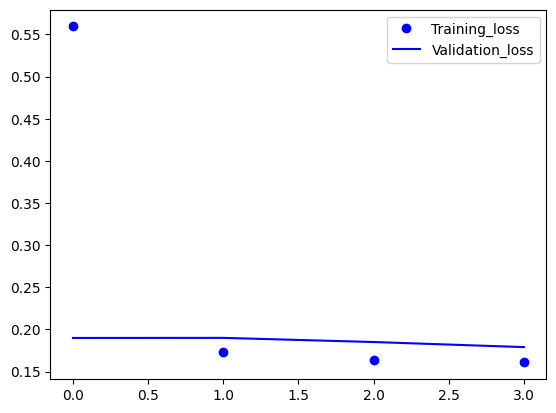

In [37]:
epochs = range(len(history['loss']))

plt.plot(epochs, history['loss'], 'bo', label = 'Training_loss')
plt.plot(epochs, history['val_loss'], 'b', label = 'Validation_loss')
plt.legend()

plt.show()

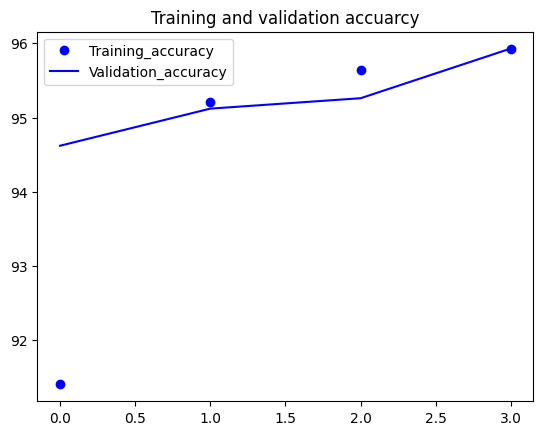

In [38]:
plt.plot(epochs, history['acc'], 'bo', label = 'Training_accuracy')
plt.plot(epochs, history['val_acc'], 'b', label = 'Validation_accuracy')
plt.title('Training and validation accuarcy')
plt.legend()

plt.show()

#Step9 테스트 데이터 셋을 이용한 성능 검증

In [39]:
test(test_loader)


Test set: Average loss: 0.1790, Accuracy: 96%



In [40]:
test_image = test_images[0]

In [41]:
prediction = model(torch.Tensor(test_image))

In [42]:
prediction.argmax()

tensor(7)

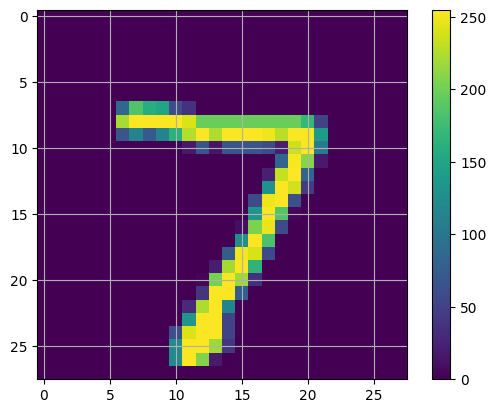

In [43]:
plt.figure()
plt.imshow(test_images[0].reshape(28,28))
plt.colorbar()
plt.grid(True)
plt.show()

관련 문제

In [ ]:
"""## DNN(MLP) 모델을 이용한 FASHION-MNIST 데이터 셋 분류
* 체점 기준 :
  - 데이터 셋 : 체점 서버내 테스트 데이터 셋
  - 성능 지표 : Accuracy
  - PASS 기준 : 80% 이상
"""

import torch
from tensorflow.keras.datasets import fashion_mnist
import numpy as np


"""* Step 1. Inptu tensor 와 Target tensor 준비(훈련데이터)"""

# label 데이터의 각 value 에 해당하는 class name 정보
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 수강생 작성 코드
# 1. import 한 fashion_mnist API를 이용하여 fashion_mnist 데이터 셋을 다운로드 받으세요



"""* Step 2. 데이터의 전처리"""

# 수강생 작성 코드
# 1. 3차원 형태(batch, hight, width)의 train, test feature 데이터를 2차원(batch, hight*width)으로 변경 하세요
# 2. feature 데이터를 [0, 1] 사이로 scailing을 수행하세요



"""* Step 3. batch 구성을 위한 데이터 pipeline 생성"""

# 수강생 작성 코드
# 1. 훈련 데이터, 테스트 데이터를 파이토치의 텐서 형태로 변환해주세요


# 수강생 작성 코드
# 1. torch.utils.data.TensorDataset API를 활용해 훈련, 테스트 데이터를 위한 Dataset 객체를 생성 하세요


# 수강생 작성 코드
# 1. torch.utils.data.DataLoader API를 활용해 훈련, 테스트 데이터 pipeline을 생성하세요


"""* Step 4. DNN(MLP) 모델 디자인"""

# 수강생 작성 코드
# 1. torch.nn.Sequential API를 이용하여 fashion_mnist 데이터 셋을 분석 하기 위한 MLP 모델을 디자인 하세요



"""* Step 5. 모델의 학습 정보 설정"""

# 수강생 작성 코드
# 1. torch.nn 모듈에 구현된 API를 이용해 분류를 위한 손실함수 객체를 생성하세요
# 2. torch.optim 모듈에 구현된 API로 옵티마이저를 설정하세요



"""* Step 6. 모델의 학습 loop 를 정의하는 함수 생성"""

def train(epoch):
  # 수강생 작성 코드
  # 1. 모델 객체를 학습에 적합한 상태로 변경하세요


  # accuracy 계산을 위한 'correct' 변수 선언 및 0 으로 초기화
  correct = 0

  # 수강생 작성 코드
  # 1. 학습데이터 에서 미니 배치를 추출하여 학습 loop를 수행하는 for문을 작성 하세요
  for batch_idx, (____, ____) in enumerate(____):
    # 수강생 작성 코드
    # 1. 모델에 input data를 전달하여 순전파를 수행하세요


    # 수강생 작성 코드
    # 1. loss 함수에 모델의 예측값 과 정답 정보를 전달하여 loss 값을 계산 하세요


    # 수강생 작성 코드
    # 1. optimizer 객체를 이용해 모델을 구성하는 파라미터들(w, b)의 gradient를 초기화 하세요


    # 수강생 작성 코드
    # 1. 모델을 구성하는 파라미터들(w, b)이 loss 에 미치는 영향도(gradient)를 계산 하세요


    # 수강생 작성 코드
    # 1. 계산된 영향도(gradient) 값을 이용하여 모델의 파라미터(w,b)를 업데이트 하세요


    # 모델의 성능 지표를 계산 및 출력 하여 학습 진행을 체크
    correct += (output.argmax(dim=1) == target).type(torch.float).sum().item()

    if batch_idx%50==0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\tAccuracy: {:.2f}%'.format(
            epoch,
            (batch_idx+1) * len(data),
            len(train_loader.dataset),
            100. * (batch_idx+1) / len(train_loader),
            batch_loss.item(),
            100. * correct / ((batch_idx+1) * len(data))
            ))


"""* Step 7. 모델의 검증 loop 를 정의하는 함수 생성"""

def test(data_loader):
  # 수강생 작성 코드
  # 1. 모델 객체를 테스트에 적합한 상태로 변경하세요


  # 수강생 작성 코드
  # 1. 모델의 성능을 지표를 계산에 필요한 정보 수집을 위한 변수 선언
  #   - loss 를 수집하기 위한 'test_loss' 변수 선언 및 0 으로 초기화
  #   - accuracy 계산을 위한 모델의 예측 class 와 정답 class 가 일치하는 개수를 수집하기 위한
  #     'correct' 변수 선언 및 0 으로 초기화


  # 수강생 작성 코드
  # 1. 검증데이터 에서 미니 배치를 추출하여 검증 loop를 수행하는 for문을 작성 하세요
  for ____, ____ in ____:
    # 수강생 작성 코드
    # 1. 모델에 input data를 전달하여 순전파를 수행하세요


    # 수강생 작성 코드
    # 1. loss 함수에 모델의 예측값 과 정답 정보를 전달하여 모델의 성능을 검증하기 위한 loss 값을 계산 하세요


    # logits 정보를 이용하여 모델의 예측 값과 정답 을 비교하여 모델이 맞춘 데이터의 개수를 계산
    correct += (output.argmax(dim=1) == target).type(torch.float).sum().item()

  # 'test_loss' 변수 에 누적된 배치 별 loss 의 합을 이용해 전체 loss를 계산 하세요
  test_loss /= len(test_loader)

  # 'correct' 에 누적된 배치 별 정답 개수의 합을 배치의 개수로 나누에 전체 데이터 셋의 평균 accuracy를 계산 하세요
  accuracy = 100. * correct / len(validation_loader.dataset)

  # 모델의 성능 지표를 계산 및 출력 하여 학습 진행을 체크하는 코드
  print('\nTest set: Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(
        test_loss,
        accuracy))

"""* Step 8. 훈련 함수와 검증 함수를 이용한 모델의 훈련 및 검증"""
# 수강생 작성 코드
# 1. 반복문을 활용해 epoch 수 만큼 훈련 및 검증을 수행 하세요.


# 수강생 작성 코드
# 1. 테스트 데이터 셋을 이용해 모델의 성능을 확인 하세요
